# Epithelium Visualization

In [9]:
from pprint import pprint
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import ipyvolume as ipv

import tyssue


from tyssue import Sheet, SheetGeometry  as geom
from tyssue.generation import three_faces_sheet
from tyssue.draw import sheet_view
from tyssue import config
from tyssue import Monolayer, config
from tyssue.generation import extrude




In [2]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

## Epithelial sheet representation

Usually in tyssue, parameters and settings are stored in a `spec` nested dictionnary.

This dictionnary has 4 (2D) or 5 (3D) keys corresponding to the vertices, edges, faces (and cells) plus a "settings" key for parameters affecting the whole object. Defaults are defined in the `tyssue.config` module.



### The  default

In [7]:
draw_specs = tyssue.config.draw.sheet_spec()

In [10]:
pprint(draw_specs)

{'edge': {'alpha': 0.8,
          'color': '#2b5d0a',
          'colormap': 'viridis',
          'head_width': 0.0,
          'length_includes_head': True,
          'shape': 'right',
          'visible': True,
          'width': 0.5,
          'zorder': 1},
 'face': {'alpha': 1.0, 'color': '#8aa678', 'visible': False, 'zorder': -1},
 'grad': {'alpha': 0.5, 'color': '#000a4b', 'width': 0.04},
 'vert': {'alpha': 0.3,
          'color': '#000a4b',
          's': 100,
          'visible': False,
          'zorder': 2}}


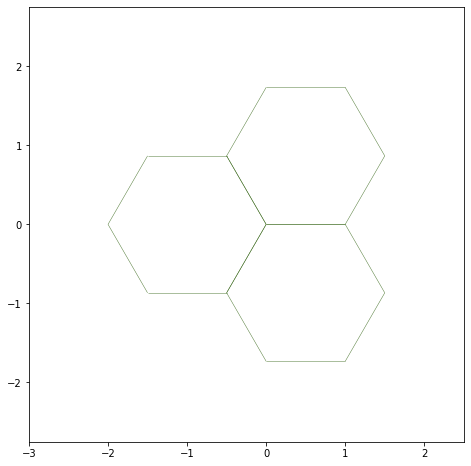

In [5]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


### Showing the edges half-edges



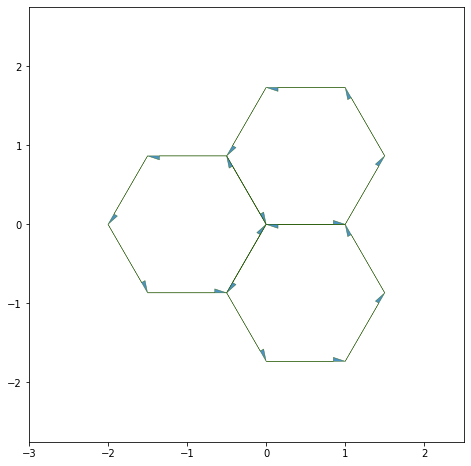

In [6]:
draw_specs['edge']['head_width'] = 0.1

fig, ax = sheet_view(sheet, ['x', 'y'], **draw_specs)


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

### Coloring

In [11]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)
draw_specs['vert']['visible'] = True

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

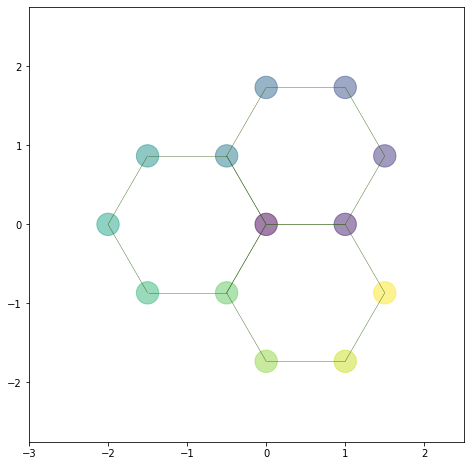

In [12]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



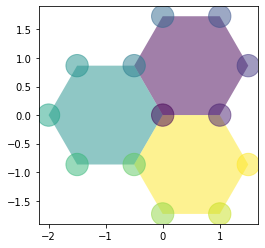

In [13]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = sheet.face_df['col']
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

In [14]:
draw_specs['edge']['visible'] = True

#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
draw_specs['edge']['color'] = edge_cmap #[0, 0, 0, 1]
#draw_specs['edge']['color'] = [0, 0, 0, 0.2]

draw_specs['edge']['width'] = 8. * np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

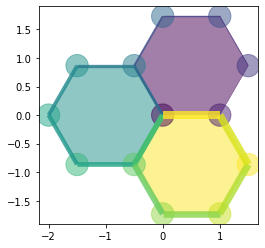

In [15]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

## Ipyvolume based

In [16]:

extruded = extrude(sheet.datasets, method='translation')
specs = config.geometry.bulk_spec()
monolayer = Monolayer('mono', extruded, specs)



ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D")
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

### Vertex based color

In [17]:
color = (monolayer.vert_df.x**2
         + monolayer.vert_df.y**2
         + monolayer.vert_df.z**2)


ipv.clear()
fig2, mesh = sheet_view(monolayer, edge={"color":color}, mode="3D")
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

#### Edge based color

In [18]:
color = monolayer.edge_df['dy']
ipv.clear()
fig2, mesh = sheet_view(monolayer, edge={"color":color}, mode="3D")
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

### Displaying faces

In [19]:
draw_specs = config.draw.sheet_spec()

draw_specs['face']['visible'] = True



#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = np.random.random(monolayer.face_df.shape[0])

draw_specs['face']['alpha'] = 0.5

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

### Higlighting faces

In [20]:
from tyssue.draw import highlight_cells, highlight_faces

In [21]:
highlight_faces(monolayer.face_df, [0, 2, 3], reset_visible=True)

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

In [22]:
highlight_cells(monolayer, 1, reset_visible=True)

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…